# Difference between Bagging and Random Forest (RF)

## Base Learners in Bagging:

1. **Flexibility in Base Learner Selection:**

* In Bagging (Bootstrap Aggregating), the term "base learner" refers to the individual models or classifiers used within the ensemble.

* Bagging is a general ensemble method that can work with various types of base learners, such as **decision trees, support vector machines (SVM), neural networks, k-nearest neighbors (KNN)**, and more.

* The choice of base learner depends on the specific problem domain, the characteristics of the data, and the performance requirements.

## Base Learners in Random Forest:

1. **Specific Use of Decision Trees:**

* Random Forest is an extension of Bagging that focuses only on using **decision trees** as the base learners.

* Random Forest exclusively employs decision trees due to their simplicity, interpretability, and effectiveness in capturing complex relationships in the data.

#### **One Most Important Question aries**:

**Ques: *Does this means if I use Decision Tree to construct a Bagging model, it becomes a Random Forest*?**

If you think deeply, the answer is **No**.

Why?

Let's delve further.

## Feature Selection in Bagging:

2. **Random Subset of Features for Each Base Learner:**

* In Bagging, each base learner (e.g., decision tree) is trained on a random subset of features selected from the original feature set.

* This random selection of features helps introduce diversity among the base learners, as different subsets of features are considered during training.

* By training on different subsets of features, the base learners learn to focus on different aspects of the data, leading to a more diverse set of models.

## Feature Selection in Random Forest:

2. **Random Subset of Features for Each Decision Tree:**

* Similar to Bagging, Random Forest also selects a random subset of features for each decision tree. However, it takes this concept a step further.

* In Random Forest, at each node split of a decision tree, a random subset of features is considered for determining the best split.

* This process of randomly selecting features at each node split helps decorrelate the trees from each other.

* As a result, the decision trees in a Random Forest tend to be more diverse compared to those in traditional Bagging, where the same subset of features may be considered for all node splits.

*Let's explore these in detail with real-life dataset.*

### Problem Statement

Predict next-day rain by training classification models on the target variable RainTomorrow.

We can read the data back preprocessed datasets for training, validation, and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_X = pd.read_parquet("test_inputs.parquet")
train_Y = pd.read_parquet('test_targets.parquet')["RainTomorrow"]

In [3]:
print('train_inputs:', train_X.shape)
print('train_targets:', train_Y.shape)

train_inputs: (2591, 123)
train_targets: (2591,)


In [4]:
numeric_cols = train_X.select_dtypes(include=np.number).columns.tolist()

In [5]:
X = train_X[numeric_cols]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_inputs, test_inputs ,train_target ,test_target = train_test_split(X, train_Y, test_size=0.4, random_state=42)


In [8]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_target.shape)

print('test_inputs:', test_inputs.shape)
print('test_targets:', test_target.shape)

train_inputs: (1554, 118)
train_targets: (1554,)
test_inputs: (1037, 118)
test_targets: (1037,)


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## **Feature Selection in Bagging:**


In [17]:
rsub = BaggingClassifier(
    max_features=2,
    bootstrap_features=True,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [19]:
rsub.fit(train_inputs,train_target)
y_pred = rsub.predict(test_inputs)
print("Random Subspaces using Bagging",accuracy_score(test_target,y_pred))

Random Subspaces using Bagging 0.7521697203471552


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


In [12]:
from sklearn.tree import plot_tree

In [14]:
import matplotlib.pyplot as plt


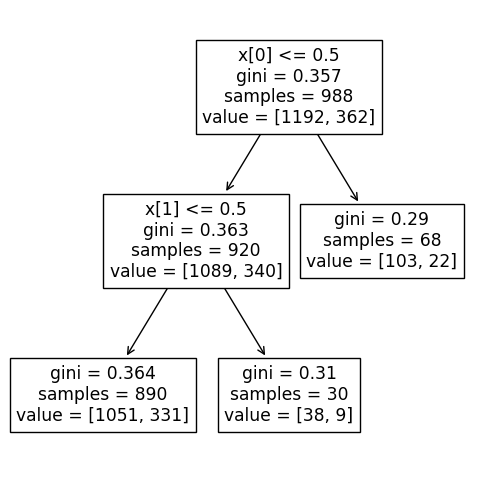

In [23]:
plt.figure(figsize=(6,6))
plot_tree(rsub.estimators_[0])
plt.show()

After using `max_sample = 2`, the tree uses only 2 columns = (0,1) . i.e. **Tree Level Column Sampling**.

## **Feature Selection in Random Forest:**


In [33]:
rf = RandomForestClassifier(max_features=2, max_depth = 3, random_state=42,
    verbose = 1,
    n_jobs=-1)

In [34]:
rf.fit(train_inputs,train_target)
y_pred = rf.predict(test_inputs)
print("Random Subspaces using Random Forest",accuracy_score(test_target,y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


Random Subspaces using Random Forest 0.7521697203471552


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


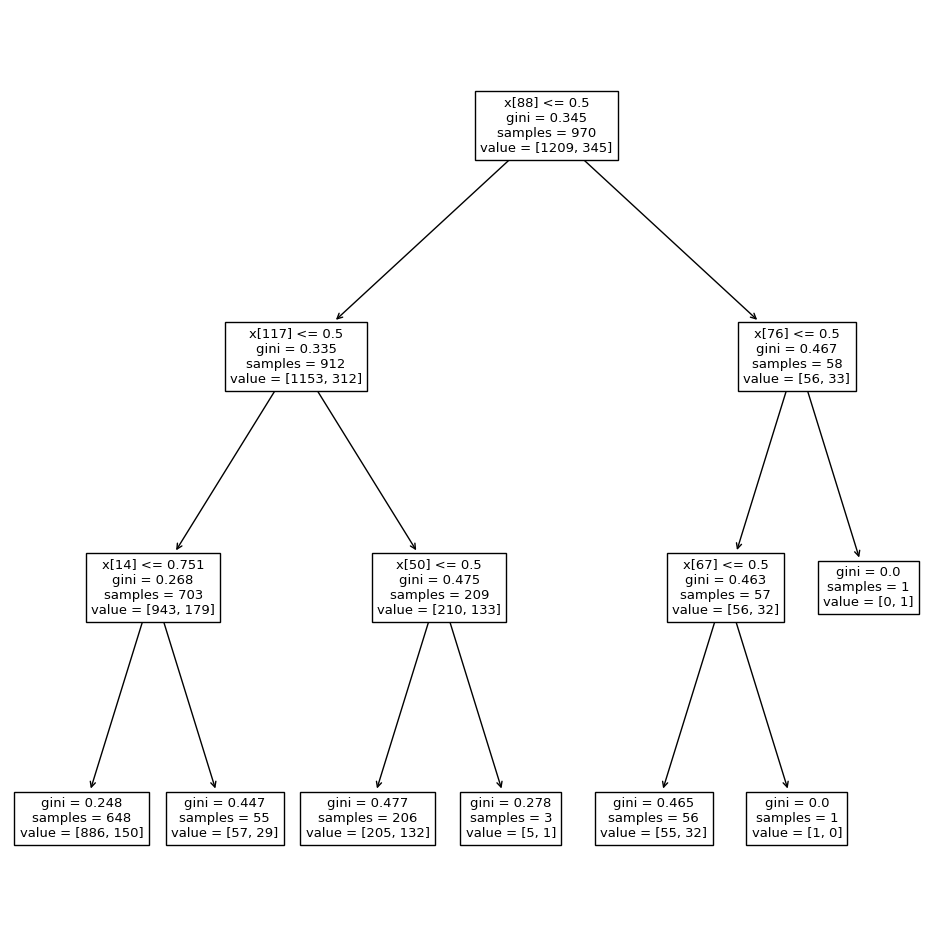

In [36]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

After using `max_sample = 2`, the tree uses only 2 but random columns i.e. **Node Level Column Sampling**.

## Conclusion

Both Bagging and Random Forest leverage the concept of feature selection to introduce diversity among base learners.

While Bagging randomly selects features for each base learner, Random Forest goes a step further by decorrelating trees through random feature selection at each node split.

This decorrelation helps mitigate overfitting and improves the generalization performance of the ensemble model, making Random Forest a powerful algorithm for various machine learning tasks.

> Stay tuned for other Ensemble Techniques Repo and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.